In [72]:
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv('train.csv')
import seaborn as sns

# Preview Data

In [74]:
print(df.head())
print(df.info())
print(df.describe())
print(df.columns)

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

# Check Missing Values


In [76]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


# Summary

In [78]:
print("\nSummary :\n", df.describe(include="all"))


Summary :
         PassengerId    Survived      Pclass                     Name   Sex  \
count    891.000000  891.000000  891.000000                      891   891   
unique          NaN         NaN         NaN                      891     2   
top             NaN         NaN         NaN  Braund, Mr. Owen Harris  male   
freq            NaN         NaN         NaN                        1   577   
mean     446.000000    0.383838    2.308642                      NaN   NaN   
std      257.353842    0.486592    0.836071                      NaN   NaN   
min        1.000000    0.000000    1.000000                      NaN   NaN   
25%      223.500000    0.000000    2.000000                      NaN   NaN   
50%      446.000000    0.000000    3.000000                      NaN   NaN   
75%      668.500000    1.000000    3.000000                      NaN   NaN   
max      891.000000    1.000000    3.000000                      NaN   NaN   

               Age       SibSp       Parch  Ticket 

# Fill Missing Values

In [80]:
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode())
df.drop(columns=['Cabin'],inplace=True)

# Analysis

In [82]:
survival_by_gender = df.groupby("Sex")["Survived"].mean() * 100
print("\nSurvival Rate by Gender (%):\n", survival_by_gender.round(2))

survival_by_class = df.groupby("Pclass")["Survived"].mean() * 100
print("\nSurvival Rate by Class (%):\n", survival_by_class.round(2))

survival_by_class_gender = df.groupby(["Pclass", "Sex"])["Survived"].mean() * 100
print("\nSurvival Rate by Class & Gender (%):\n", survival_by_class_gender.round(2))


Survival Rate by Gender (%):
 Sex
female    74.20
male      18.89
Name: Survived, dtype: float64

Survival Rate by Class (%):
 Pclass
1    62.96
2    47.28
3    24.24
Name: Survived, dtype: float64

Survival Rate by Class & Gender (%):
 Pclass  Sex   
1       female    96.81
        male      36.89
2       female    92.11
        male      15.74
3       female    50.00
        male      13.54
Name: Survived, dtype: float64


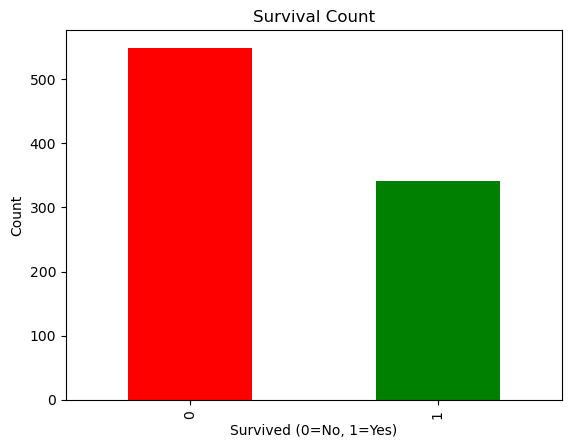

In [83]:
df['Survived'].value_counts().plot(kind="bar", color=["red", "green"])
plt.title("Survival Count")
plt.xlabel("Survived (0=No, 1=Yes)")
plt.ylabel("Count")
plt.show()

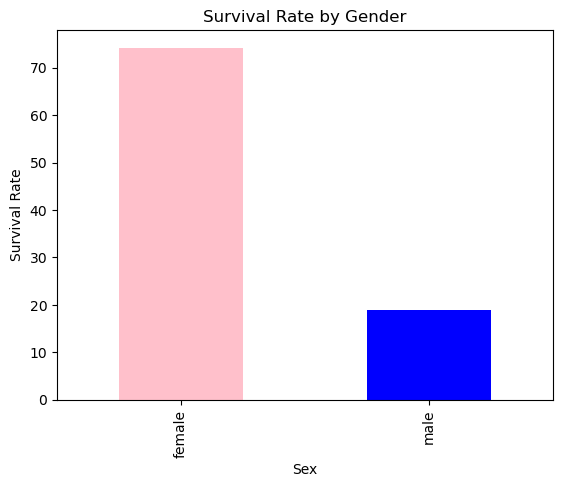

In [84]:
survival_by_gender.plot(kind="bar", color=["pink", "blue"])
plt.title("Survival Rate by Gender")
plt.ylabel("Survival Rate")
plt.show()

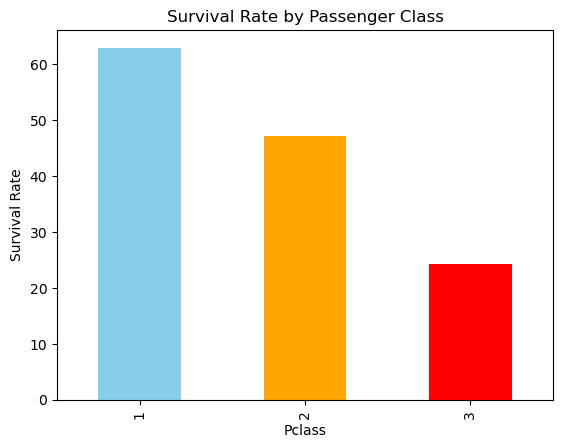

In [85]:
survival_by_class.plot(kind="bar", color=["skyblue", "orange", "red"])
plt.title("Survival Rate by Passenger Class")
plt.ylabel("Survival Rate")
plt.show()

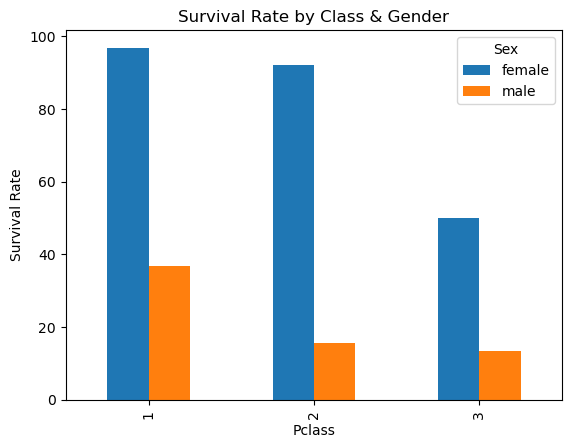

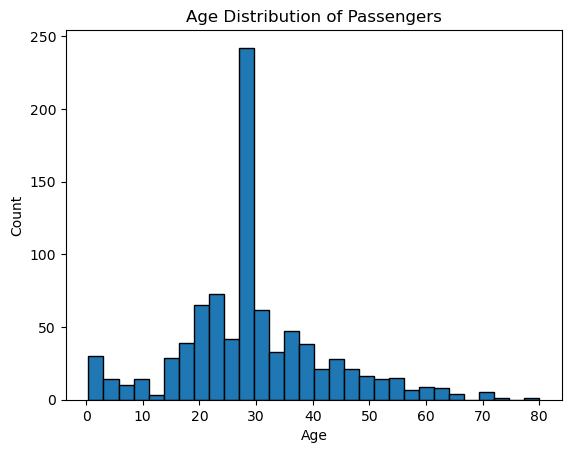

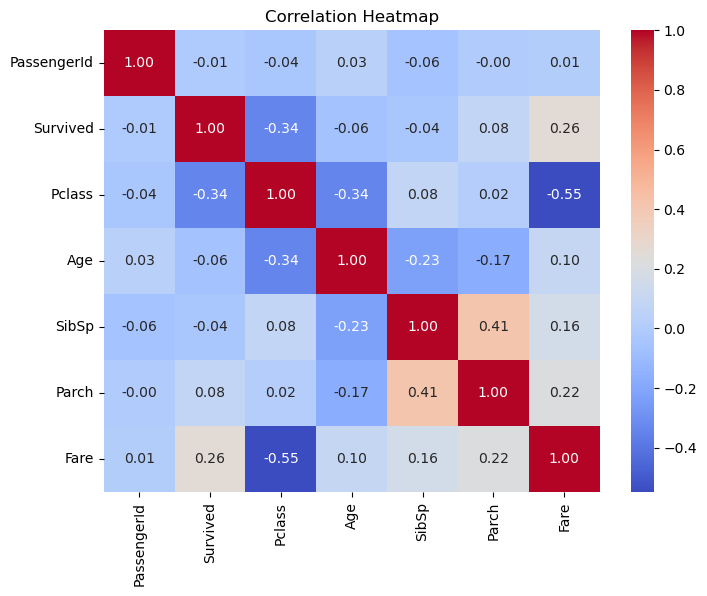

In [86]:
survival_by_class_gender.unstack().plot(kind="bar", stacked=False)
plt.title("Survival Rate by Class & Gender")
plt.ylabel("Survival Rate")
plt.show()

# Age Distribution
plt.hist(df['Age'], bins=30, edgecolor="black")
plt.title("Age Distribution of Passengers")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

# Correlation Heatmap (Numerical features only)
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()